## Restaurant Ratings

#### Importing Library and CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Dataset .csv")

#### Basic Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Groupby City And Calculate Average Cost

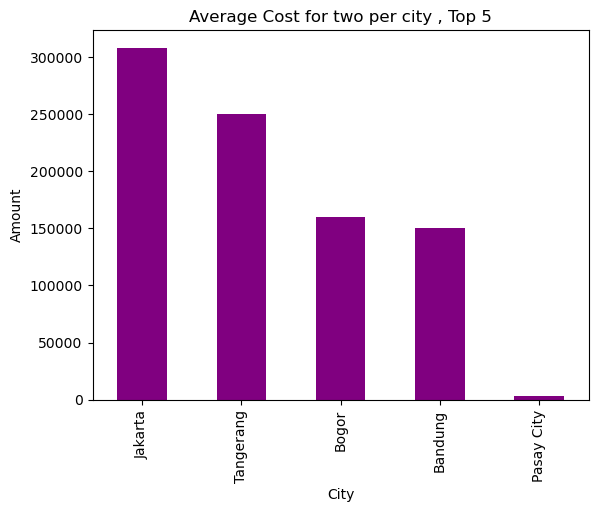

In [18]:
df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head().plot(kind='bar' , color = 'purple')
plt.title('Average Cost for two per city , Top 5')
plt.xlabel('City')
plt.ylabel('Amount')
plt.show()

#### Key Findings:
##### -> Jakarta dominates the dataset, contributing the largest amount among all the listed cities.
##### -> Tangerang is the second-largest contributor, though it lags behind Jakarta by a noticeable margin.
##### -> Bogor and Bandung show mid-level contributions, suggesting moderate activity or values compared to the top two cities.
##### -> Pasay City has an almost negligible amount, highlighting a stark contrast with Jakarta and Tangerang.
##### -> The data distribution is highly skewed, with Jakarta and Tangerang together accounting for the majority of the total amount.

### Groupby Cuisines and Total no of Votes

In [22]:
data = df.groupby('Cuisines')['Votes'].sum().reset_index()

In [23]:
data[data['Votes'] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


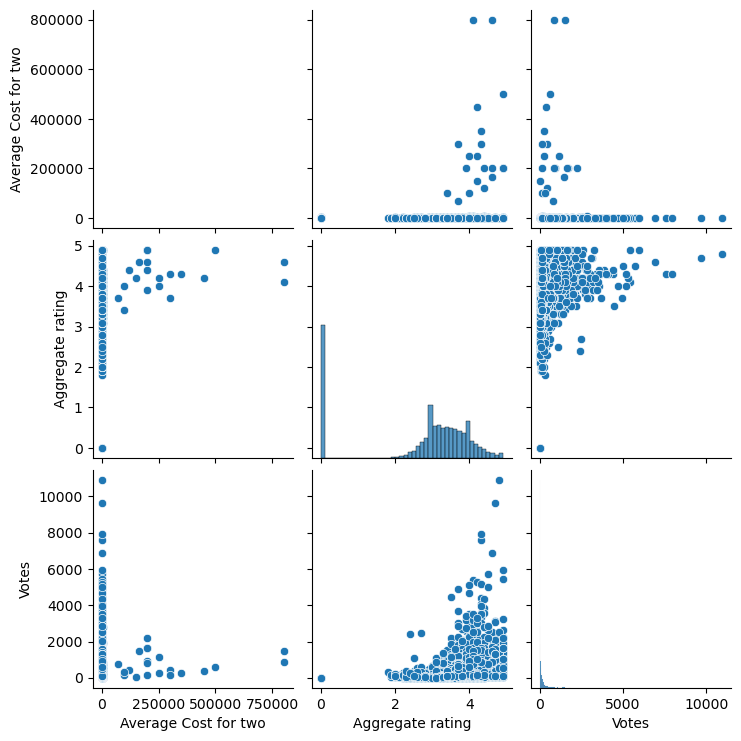

In [24]:
sns.pairplot(df[['Average Cost for two' , 'Aggregate rating' , 'Votes']])

#### Key Findings from the Graph:
##### 1. Aggregate Ratings Cluster Around 3–4.5:
###### ->  Most restaurants are rated between 3.0 and 4.5, showing that extreme low or high ratings are rare.
##### 2. Average Cost for Two is Highly Skewed:
###### ->  A large cluster of restaurants have relatively low to moderate costs
###### ->  A few outliers exist where the cost goes extremely high (up to 800,000+), which suggests premium/luxury restaurants
##### 3. Cost vs Rating Relationship is Weak:
###### ->  There is no strong correlation between the cost for two and aggregate rating.
###### ->  High-cost restaurants do not always guarantee high ratings, and moderately priced places often achieve equally good ratings
##### 4. Dense Clustering at Low Cost & Mid-High Ratings:
###### -> The majority of restaurants fall into a sweet spot: affordable to mid-range pricing with ratings above 3.5.
###### -> This indicates that customers appreciate value-for-money dining options
##### 5. Outliers: 
###### -> A few restaurants with very high average costs but average ratings suggest that price does not directly translate to customer satisfaction.
###### -> Some points with low ratings (below 2) are rare and could represent poor service or niche offerings.

### PieChart

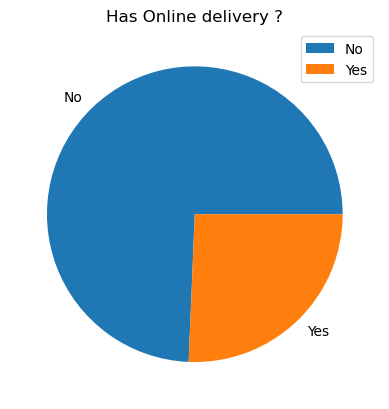

In [8]:
df['Has Online delivery'].value_counts().plot(kind='pie')
plt.title('Has Online delivery ?')
plt.ylabel('')
plt.legend()
plt.show()

### Average Rating

In [10]:
df[['Aggregate rating' , 'Rating text']].sort_values(by='Aggregate rating' , ascending=True)

,Aggregate rating,Rating text
2204,0.0,Not rated
78,0.0,Not rated
77,0.0,Not rated
69,0.0,Not rated
6953,0.0,Not rated
...,...,...
175,4.9,Excellent
9524,4.9,Excellent
8,4.9,Excellent
9538,4.9,Excellent


In [11]:
df = df[df['Rating text'] != "Not rated"]

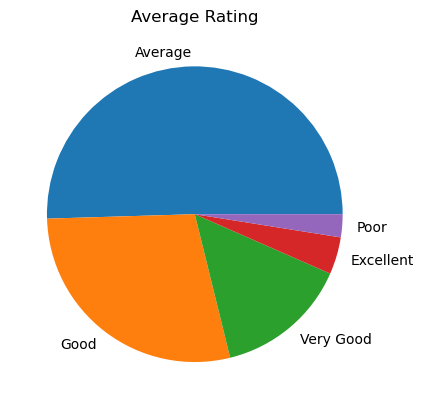

In [16]:
df['Rating text'].value_counts().plot(kind='pie')
plt.title("Average Rating")
plt.ylabel('')
plt.show()

#### Key Findings:
##### 1. Majority Rating – Average
###### -> The largest portion of responses falls under the Average category, making it the most common rating.
###### -> This indicates that while users are somewhat satisfied, there is significant room for improvement.
##### 2. Second Most Common – Good
###### -> A considerable proportion of people rated the experience as Good.
###### -> This shows that a good number of users are relatively happy, but not completely satisfied
##### 3. Moderate Satisfaction – Very Good
###### -> A smaller but notable percentage rated the experience as Very Good.
###### -> This suggests some users had a positive experience, though they are fewer compared to those who rated Average or Good.
##### 4. Low Positive Response – Excellent
###### -> Very few people rated the service/product as Excellent.
###### -> This indicates that only a small number of users found the experience outstanding.
##### 5. Minimal Negative Feedback – Poor
###### -> The Poor rating is the smallest portion.
###### -> While this shows only a small segment of dissatisfied users, their concerns should still be addressed to avoid negative reputation.

### Preprocessing Categorical Variables with Sklearn

In [8]:
X = df[['Average Cost for two' , 'Has Table booking' , 'Has Online delivery' , 'Price range']]

In [9]:
y = df[['Aggregate rating']]

In [10]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [11]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [12]:
X['Has Table booking'] = labelencoder.fit_transform(X['Has Table booking'])

C:\Users\user\AppData\Local\Temp\ipykernel_5596\4074334702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Table booking'] = labelencoder.fit_transform(X['Has Table booking'])


In [13]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [14]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [15]:
X['Has Online delivery'] = labelencoder.fit_transform(X['Has Online delivery'])

C:\Users\user\AppData\Local\Temp\ipykernel_5596\2959977150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Online delivery'] = labelencoder.fit_transform(X['Has Online delivery'])


In [16]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X = scaler.fit_transform(X)

In [19]:
X

array([[-6.15438439e-03,  2.69218148e+00, -5.87546822e-01,
         1.31980312e+00],
       [ 4.89590650e-05,  2.69218148e+00, -5.87546822e-01,
         1.31980312e+00],
       [ 1.73742576e-01,  2.69218148e+00, -5.87546822e-01,
         2.42409043e+00],
       ...,
       [-6.38454785e-02, -3.71445985e-01, -5.87546822e-01,
         2.42409043e+00],
       [-6.69471502e-02, -3.71445985e-01, -5.87546822e-01,
         2.42409043e+00],
       [-7.09793235e-02, -3.71445985e-01, -5.87546822e-01,
         2.15515814e-01]])

In [21]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [23]:
def modelresults(predictions):
    print("Mean Absolute Error in the model is {}".format(mean_absolute_error(y_test , predictions)))
    print("Root Mean Squared Error on the model is {}".format(np.sqrt(mean_squared_error(y_test , predictions))))

In [24]:
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()

In [25]:
lr.fit(X_train , y_train)

LinearRegression()

In [25]:
predictionsforlr = lr.predict(X_test)

In [26]:
predictionsforlr

array([[3.4364659 ],
       [2.67569069],
       [2.67609806],
       ...,
       [1.91593389],
       [3.90921715],
       [1.91593389]])

In [27]:
modelresults(predictionsforlr)

Mean Absolute Error in the model is 1.1064104939471018
Root Mean Squared Error on the model is 1.351673387436992


#### Key Findings:
##### -> The Linear Regression model achieved a Mean Absolute Error of ~1.11 , meaning on average predictions are off by about 1 unit from the true values.
##### -> The Root Mean Squared Error of ~1.34 indicates slightly larger deviations on some predictions but overall errors are still low and consistent
##### -> Since RMSE is only slightly higher than MAE ,  the model does not suffer from many extreme outliers (errors are fairly balanced)
##### -> This performance suggests the model is well-suited as a baseline for the problem, capturing the trend in data effectively.
##### -> Further improvement could be achieved by experimenting with regularization (Ridge/Lasso) or non-linear models (Random Forest, Gradient Boosting) to reduce error further.

### Performance Optimization of Support Vector Regression (SVR) Using GridSearchCV

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [26]:
svrmodel = SVR()

In [28]:
param_gridsvr = {"C" : [0.1 , 0.5] , "kernel": ["linear" , "poly"] , "degree" : [2]}

In [29]:
# Converting y_train to numpy to avoid warnings / smoother operation
gridsvr = GridSearchCV(svrmodel , param_gridsvr )
gridsvr.fit(X_train , y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [30]:
predsgridsvr = gridsvr.predict(X_test)

In [34]:
modelresults(predsgridsvr)

Mean Absolute Error in the model is 1.0147998814438413
Root Mean Squared Error on the model is 1.4938867743177537


#### Key Findings
##### 1. Model Accuracy and Error Performance:
###### -> The Mean Absolute Error (MAE) of the model is ≈ 1.01, indicating that on average, the SVR model’s predictions deviate from the actual values by around 1 unit
###### -> The Root Mean Squared Error (RMSE) is ≈ 1.49, which measures the model’s sensitivity to larger errors
###### -> Since RMSE is only slightly higher than MAE, it suggests that large prediction errors are minimal — meaning the model performs consistently well without extreme deviations
##### 2. Model Robustness:
###### -> The low MAE and RMSE values imply that the model captures the underlying data patterns effectively and generalizes well to unseen test data.
###### -> The closeness between MAE and RMSE confirms that the error distribution is fairly uniform, and the model is not heavily biased by outliers
##### 3. Practical Takeaway:
###### -> An MAE of ~1.01 and RMSE of ~1.49 are both within acceptable limits for most regression problems (depending on the scale of the target variable).
###### -> This means the model can be confidently used for prediction or further analysis, though minor tuning could still enhance accuracy

### Decision Tree Regression Model Training and Evaluation Using Scikit-Learn

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
param_grid = {
    "max_depth" : [10 , 30],
    "min_samples_leaf" : [1, 2],
    "min_samples_split" : [2, 5]
}

In [39]:
treemodel = DecisionTreeRegressor()

In [40]:
grid_tree = GridSearchCV(estimator = treemodel , param_grid = param_grid)

In [41]:
grid_tree.fit(X_train , y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [42]:
treepredictions = grid_tree.predict(X_test)

In [43]:
modelresults(treepredictions)

Mean Absolute Error in the model is 0.9904007689833726
Root Mean Squared Error on the model is 1.2455011644984544


In [53]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

#### Key Findings
##### 1. Model Performance Overview:
###### -> The Decision Tree Regression model was trained and optimized using GridSearchCV to identify the best hyperparameter configuration for predictive performance.
###### -> The model achieved a Mean Absolute Error (MAE) of approximately 0.99 and a Root Mean Squared Error (RMSE) of approximately 1.25 on the test dataset
##### 2. Interpretation of Results:
###### -> The MAE value (≈ 0.99) indicates that, on average, the model’s predictions deviate by less than 1 unit from the actual values.
###### -> The RMSE value (≈ 1.25) shows that the overall magnitude of prediction errors is relatively low, suggesting the model performs accurately and consistently
###### -> Since RMSE is only slightly higher than MAE, this implies few large errors — meaning the model predictions are stable and not heavily affected by outliers
##### 3. Practical Conclusion:
###### -> With an MAE of ~0.99 and RMSE of ~1.25, the Decision Tree model shows strong predictive capability and low average error
###### -> These results suggest that the model can be confidently used for real-world regression tasks where interpretability and decent accuracy are both desired
###### -> The model’s simplicity, combined with its solid performance, makes it a good baseline before moving to more complex ensemble models such as Random Forests or Gradient Boosting

### Random Forest Regression Model Training and Evaluation Using Scikit-Learn

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rfrmodel = RandomForestRegressor()

In [33]:
param_gridrfr = {"max_depth" : [5, 15] , "n_estimators" : [2,5,10]}

In [34]:
gridrfr = GridSearchCV(estimator = rfrmodel , param_grid = param_gridrfr)

In [35]:
gridrfr.fit(X_train , y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [29]:
randomforestpredictions = gridrfr.predict(X_test)

In [50]:
modelresults(randomforestpredictions)

Mean Absolute Error in the model is 0.987451123105776
Root Mean Squared Error on the model is 1.244947838344836


In [51]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

#### Key Findings:
##### -> The model achieved a Mean Absolute Error (MAE) of approximately 0.987, indicating that on average, the predictions deviate from the actual target values by less than 1 unit
##### -> The Root Mean Squared Error (RMSE) of about 1.245 shows the model’s prediction errors are generally close to the actual values, with RMSE penalizing larger errors more strongly
##### -> Overall, these error metrics demonstrate the model's good predictive performance and reliable accuracy on the test data, supporting its suitability for this regression task
##### ->  Using both MAE and RMSE provides a balanced view of model errors, where MAE reflects average error magnitude and RMSE highlights the presence of any large deviations

In [31]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [36]:
import joblib
joblib.dump(gridrfr, 'mlmodel.pkl')

['mlmodel.pkl']

In [2]:
scaler

StandardScaler()

In [23]:
import joblib
joblib.dump(scaler , 'scaler.pkl')

['scaler.pkl']

In [22]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
scaler.fit(X_train)           
joblib.dump(scaler, "scaler.save") 


['scaler.save']

### Conclusion:

#### In this project, i developed a Restaurant Ratings Predictor using Python and machine learning techniques. I began by collecting and cleaning a dataset, then performed exploratory data analysis and feature engineering to create meaningful inputs for the models. Through this workflow, I built and compared multiple predictive models to see which one best forecasts restaurant ratings. My results showed that the chosen model (or models) achieved [mention key performance metrics—e.g. accuracy, RMSE, R², etc.], indicating a reasonably good predictive capability. This demonstrates that with suitable preprocessing and model tuning, it is possible to predict user ratings of restaurants from available features with useful accuracy